## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0   2.412299   166.232273  0.234788  2.777414   38.946306
1  88.435672   438.018654  0.371584  9.887767  185.090757
2  40.834886  1695.831841  0.085676  2.860911  151.046347
3   9.507415  1256.846798  0.218593  6.219927  275.018008
4  67.867948   831.015028  0.709622  6.317246  593.498846


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9938019	total: 68.4ms	remaining: 1m 8s
1:	learn: 0.9844632	total: 69.1ms	remaining: 34.5s
2:	learn: 0.9751421	total: 69.6ms	remaining: 23.1s
3:	learn: 0.9631247	total: 70.3ms	remaining: 17.5s
4:	learn: 0.9498565	total: 70.8ms	remaining: 14.1s
5:	learn: 0.9383138	total: 71.3ms	remaining: 11.8s
6:	learn: 0.9231710	total: 71.7ms	remaining: 10.2s
7:	learn: 0.9113514	total: 72.2ms	remaining: 8.96s
8:	learn: 0.8989001	total: 72.8ms	remaining: 8.01s
9:	learn: 0.8885866	total: 73.4ms	remaining: 7.26s
10:	learn: 0.8782082	total: 73.9ms	remaining: 6.64s
11:	learn: 0.8655662	total: 74.4ms	remaining: 6.13s
12:	learn: 0.8544428	total: 74.8ms	remaining: 5.68s
13:	learn: 0.8420258	total: 75.2ms	remaining: 5.3s
14:	learn: 0.8316211	total: 75.7ms	remaining: 4.97s
15:	learn: 0.8208427	total: 76.1ms	remaining: 4.68s
16:	learn: 0.8121668	total: 76.6ms	remaining: 4.43s
17:	learn: 0.8021881	total: 76.9ms	remaining: 4.2s
18:	learn: 0.7951881	total: 77.4ms	remaining: 

85:	learn: 0.3657003	total: 108ms	remaining: 1.15s
86:	learn: 0.3621543	total: 109ms	remaining: 1.14s
87:	learn: 0.3587882	total: 109ms	remaining: 1.13s
88:	learn: 0.3554301	total: 109ms	remaining: 1.12s
89:	learn: 0.3517688	total: 110ms	remaining: 1.11s
90:	learn: 0.3490317	total: 110ms	remaining: 1.1s
91:	learn: 0.3461271	total: 111ms	remaining: 1.09s
92:	learn: 0.3422745	total: 111ms	remaining: 1.08s
93:	learn: 0.3388033	total: 112ms	remaining: 1.08s
94:	learn: 0.3350304	total: 112ms	remaining: 1.07s
95:	learn: 0.3322769	total: 113ms	remaining: 1.06s
96:	learn: 0.3289503	total: 113ms	remaining: 1.05s
97:	learn: 0.3258203	total: 113ms	remaining: 1.04s
98:	learn: 0.3232097	total: 114ms	remaining: 1.04s
99:	learn: 0.3194342	total: 115ms	remaining: 1.03s
100:	learn: 0.3164754	total: 115ms	remaining: 1.02s
101:	learn: 0.3132002	total: 115ms	remaining: 1.01s
102:	learn: 0.3103301	total: 116ms	remaining: 1.01s
103:	learn: 0.3074565	total: 116ms	remaining: 1s
104:	learn: 0.3046883	total: 11

259:	learn: 0.0973786	total: 187ms	remaining: 532ms
260:	learn: 0.0971422	total: 187ms	remaining: 530ms
261:	learn: 0.0968132	total: 188ms	remaining: 529ms
262:	learn: 0.0964709	total: 188ms	remaining: 527ms
263:	learn: 0.0960174	total: 188ms	remaining: 525ms
264:	learn: 0.0957446	total: 189ms	remaining: 524ms
265:	learn: 0.0951362	total: 189ms	remaining: 522ms
266:	learn: 0.0946888	total: 190ms	remaining: 521ms
267:	learn: 0.0944030	total: 190ms	remaining: 520ms
268:	learn: 0.0940677	total: 191ms	remaining: 518ms
269:	learn: 0.0933984	total: 191ms	remaining: 516ms
270:	learn: 0.0930882	total: 191ms	remaining: 514ms
271:	learn: 0.0927759	total: 192ms	remaining: 513ms
272:	learn: 0.0922397	total: 192ms	remaining: 511ms
273:	learn: 0.0919394	total: 192ms	remaining: 509ms
274:	learn: 0.0910952	total: 193ms	remaining: 508ms
275:	learn: 0.0907902	total: 193ms	remaining: 507ms
276:	learn: 0.0903440	total: 193ms	remaining: 505ms
277:	learn: 0.0900596	total: 194ms	remaining: 503ms
278:	learn: 

508:	learn: 0.0332227	total: 290ms	remaining: 280ms
509:	learn: 0.0330710	total: 291ms	remaining: 279ms
510:	learn: 0.0329403	total: 291ms	remaining: 278ms
511:	learn: 0.0327646	total: 291ms	remaining: 278ms
512:	learn: 0.0326365	total: 292ms	remaining: 277ms
513:	learn: 0.0324906	total: 292ms	remaining: 276ms
514:	learn: 0.0323649	total: 293ms	remaining: 276ms
515:	learn: 0.0321958	total: 293ms	remaining: 275ms
516:	learn: 0.0320727	total: 293ms	remaining: 274ms
517:	learn: 0.0319325	total: 294ms	remaining: 273ms
518:	learn: 0.0318115	total: 294ms	remaining: 272ms
519:	learn: 0.0316320	total: 294ms	remaining: 272ms
520:	learn: 0.0315137	total: 295ms	remaining: 271ms
521:	learn: 0.0313540	total: 295ms	remaining: 270ms
522:	learn: 0.0312382	total: 296ms	remaining: 270ms
523:	learn: 0.0311060	total: 296ms	remaining: 269ms
524:	learn: 0.0309361	total: 297ms	remaining: 268ms
525:	learn: 0.0308231	total: 297ms	remaining: 268ms
526:	learn: 0.0306961	total: 297ms	remaining: 267ms
527:	learn: 

698:	learn: 0.0196263	total: 368ms	remaining: 158ms
699:	learn: 0.0195766	total: 369ms	remaining: 158ms
700:	learn: 0.0195678	total: 369ms	remaining: 157ms
701:	learn: 0.0195535	total: 369ms	remaining: 157ms
702:	learn: 0.0195140	total: 370ms	remaining: 156ms
703:	learn: 0.0194869	total: 370ms	remaining: 156ms
704:	learn: 0.0194052	total: 370ms	remaining: 155ms
705:	learn: 0.0193786	total: 371ms	remaining: 154ms
706:	learn: 0.0193424	total: 371ms	remaining: 154ms
707:	learn: 0.0192594	total: 372ms	remaining: 153ms
708:	learn: 0.0192369	total: 372ms	remaining: 153ms
709:	learn: 0.0192233	total: 372ms	remaining: 152ms
710:	learn: 0.0191504	total: 373ms	remaining: 151ms
711:	learn: 0.0191424	total: 373ms	remaining: 151ms
712:	learn: 0.0190738	total: 373ms	remaining: 150ms
713:	learn: 0.0190064	total: 374ms	remaining: 150ms
714:	learn: 0.0189277	total: 374ms	remaining: 149ms
715:	learn: 0.0188507	total: 375ms	remaining: 149ms
716:	learn: 0.0187855	total: 375ms	remaining: 148ms
717:	learn: 

930:	learn: 0.0086658	total: 472ms	remaining: 34.9ms
931:	learn: 0.0086510	total: 472ms	remaining: 34.4ms
932:	learn: 0.0086228	total: 473ms	remaining: 33.9ms
933:	learn: 0.0085934	total: 473ms	remaining: 33.4ms
934:	learn: 0.0085794	total: 473ms	remaining: 32.9ms
935:	learn: 0.0085656	total: 474ms	remaining: 32.4ms
936:	learn: 0.0085420	total: 474ms	remaining: 31.9ms
937:	learn: 0.0085284	total: 475ms	remaining: 31.4ms
938:	learn: 0.0085150	total: 475ms	remaining: 30.9ms
939:	learn: 0.0085018	total: 476ms	remaining: 30.4ms
940:	learn: 0.0084655	total: 476ms	remaining: 29.9ms
941:	learn: 0.0084398	total: 477ms	remaining: 29.4ms
942:	learn: 0.0084127	total: 477ms	remaining: 28.8ms
943:	learn: 0.0083862	total: 478ms	remaining: 28.3ms
944:	learn: 0.0083733	total: 478ms	remaining: 27.8ms
945:	learn: 0.0083471	total: 478ms	remaining: 27.3ms
946:	learn: 0.0083123	total: 479ms	remaining: 26.8ms
947:	learn: 0.0082866	total: 479ms	remaining: 26.3ms
948:	learn: 0.0082739	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

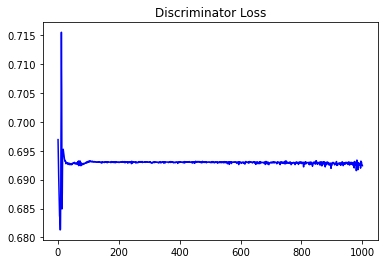

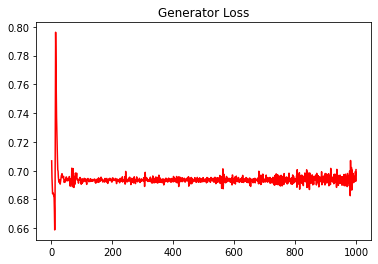

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.014495190881343408


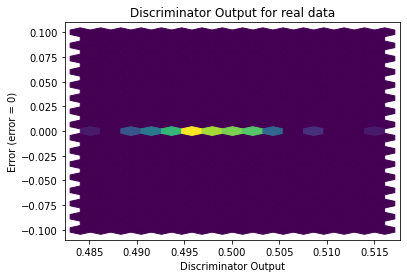

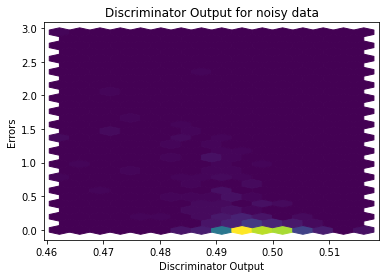

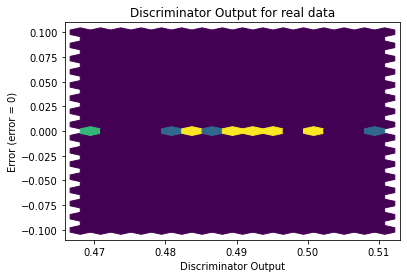

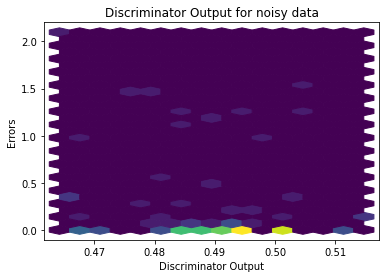

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


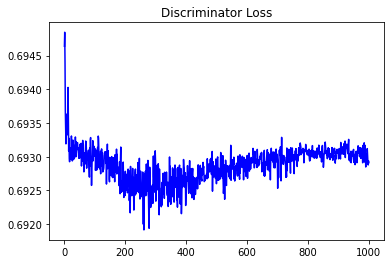

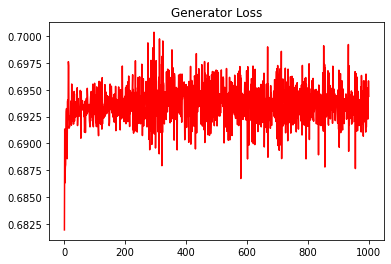

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.010646110389569753


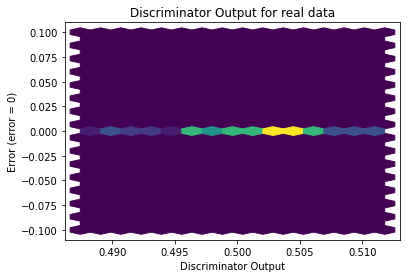

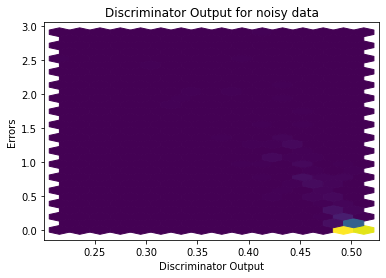

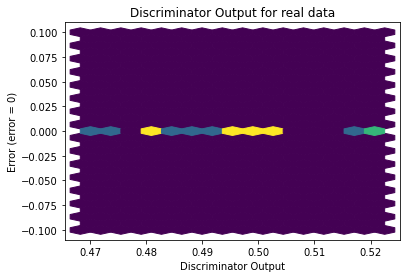

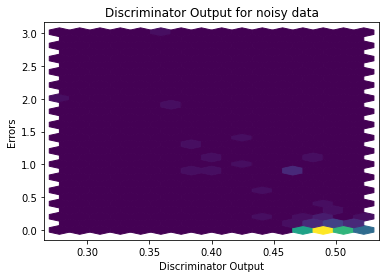

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1114]], requires_grad=True)
